<a href="https://colab.research.google.com/github/HafsaKomal/Machine-Learning-Projects/blob/main/Basic_Binary_Image_classi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font color=blue> Neural Network Concepts




```
# This is formatted as code
```

### <font color=blue> Task 1: Understand the Theoretical Concepts of Neural Network and The Basics of TensorFlow

Welcome to TensorFlow for Beginners: Basic Binary Image Classification

The following graph describes the task that we are trying to accomplish here. We want to create and train a model that takes an image of a cat or dog image as input and predicts the class of the animal. It is a simple binary classification task on Cat vs Dog dataset using CNN (Convolutional Neural Network)

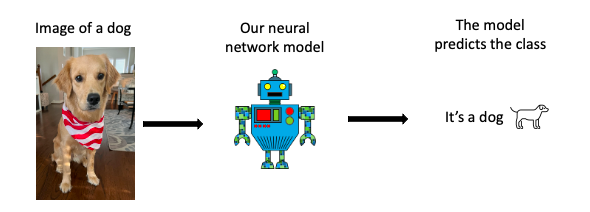

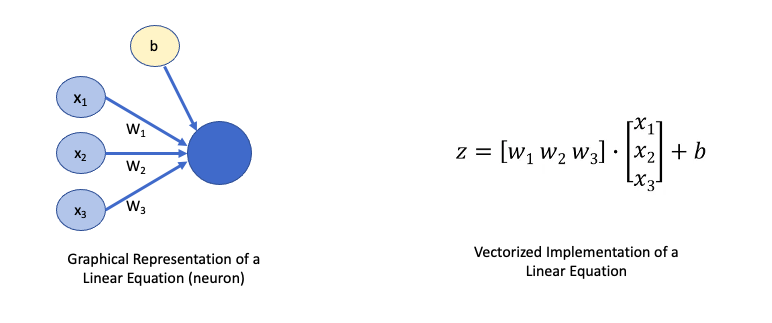

The above graph simply represents the equation:

𝑦=𝑤1∗𝑥1+𝑤2∗𝑥2+𝑤3∗𝑥3+𝑏
Where the w1, w2, w3 are called the weights and b is an intercept term called bias. The equation can also be vectorised like this:

𝑦=𝑊.𝑋+𝑏
Where X = [x1, x2, x3] and W = [w1, w2, w3].T. The .T means transpose. This is because we want the dot product to give us the result we want i.e. w1 * x1 + w2 * x2 + w3 * x3. This gives us the vectorised version of our linear equation.

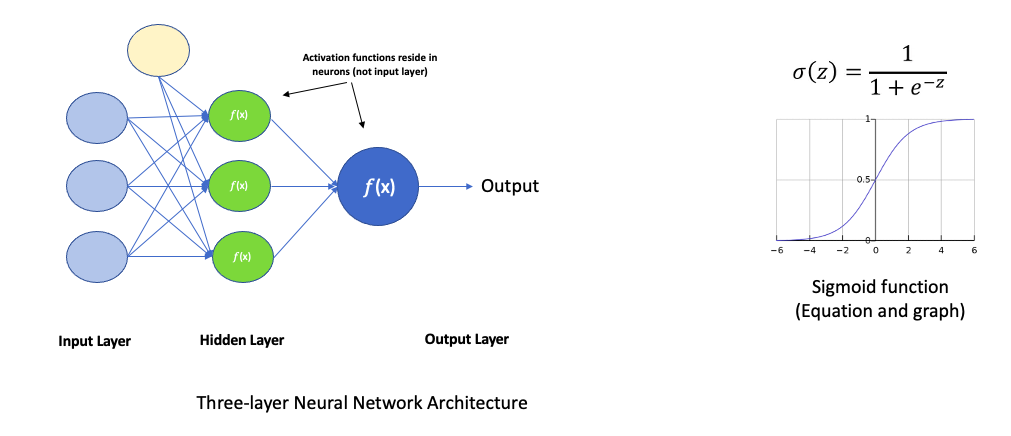

The above diagarm depicts a basic neural network architecture constructed from three types of layers:
1. Input layer — initial data for the neural network.
2. Hidden layers — intermediate layer between input and output layer and place where all the computation is done.
3. Output layer — produce the result for given inputs.

**Activation function** The activation function does the non-linear transformation to the input making it capable to learn and perform more complex tasks. The activation function compares the input value to a threshold value. If the input value is greater than the threshold value, the neuron is activated. For example, the sigmoid activation function converts its input to a probability value between 0 and 1.

ReLU, Sigmoid, Tanh are 3 the popular activation functions (non-linear) used in deep learning architectures.



*italicized text*### <font color=blue> Import libraries

In [ ]:
import os #Create directories
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers as layers

### <font color=blue> Build your first Neural Network model

In [ ]:
#One input layer, one hidden layer, one output layer
model = Sequential()
model.add(Dense(3, activation = 'sigmoid', input_dim = 2))
model.add(Dense(1))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
# Sigmoid converts input to a probability value between 0 and 1
model.add(Dense(3, activation='sigmoid', input_dim=2))
# model.add(Dense(3, activation='ReLU', input_dim=3))
model.add(Dense(1))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <font color ='blue'> Task 2: Dataset load, image preprocessing

---



Load the cats vs dogs dataset, explore dataset size and sample training images and their labels. Highlights some fundamentals behind image augmentation approaches and start using some of them to preprocess the input images before feeding them into a model pipeline.

In [ ]:
# We will use the dataset from https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip for this work
# Dataset has been derived into training and validation pieces already . Hence we nedd to keep those datasets in two separete folders.

!wget --no-check-certificate \
"https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip" \
-O "/tmp/cats-and-dogs-raw.zip"

local_zip = '/tmp/cats-and-dogs-raw.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()



--2025-04-30 16:12:03--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 142.251.175.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats-and-dogs-raw.zip’

/tmp/cats-and-dogs- 100%[===================>]  65.43M  20.6MB/s    in 4.0s    

2025-04-30 16:12:09 (16.4 MB/s) - ‘/tmp/cats-and-dogs-raw.zip’ saved [68606236/68606236]



### <font color=blue> Dataset size and check random training images

In [ ]:
  #Create separate train and validation directory as the structure has been followed in the original dataset.

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

#Type your code below to check out number of cat and dog images in train and validation folder

print("Number of cat images in train folder:",len(os.listdir(train_cats_dir)))
print("Number of dog images in train folder:",len(os.listdir(train_dogs_dir)))
print("Number of cat images in validation folder:", len(os.listdir(test_cats_dir)))
print("Number of dog images in validation folder:", len(os.listdir(test_dogs_dir)))

Number of cat images in train folder: 1000
Number of dog images in train folder: 1000
Number of cat images in validation folder: 500
Number of dog images in validation folder: 500


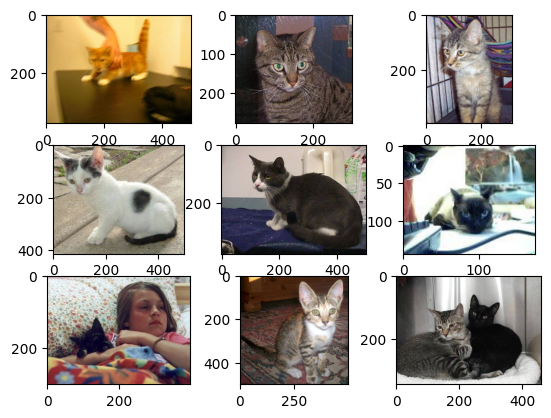

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = os.path.join(base_dir, train_cats_dir)

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)

    # define filename
    filename = folder + '/cat.' + str(i) + '.jpg' #change the file name to switch between cat and dog images

    # load image pixels
    image = imread(filename)

    # plot raw pixel data
    pyplot.imshow(image)

# show the figure
pyplot.show()


### <font color=blue> Image normalization and rescaling

In [ ]:
# prompt: cat dog

print("cat")
print("dog")


cat
dog


The image pixel values range between 0 to 255, thus to normalize the images we have to use ImageDataGenerator class which will genrate batches of normalized input images based out of the train and validation directory.
Target size of the image selected as (150,150) but it can be rescaled later. Since this project only deals with only two class (Cat and Dog) of images so the class_mode selected as 'binary' for generating the flow of training and validation images.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by ImageGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Type your code below to generate training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary',

)

# Type your code below to generate test/validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary',

)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### <font color ='blue'> Task 3: Create your first convolutional neural network model for image classification

Now, it's time to build the model for classification. I have used Keras module of Tensorflow framework to obtain most common model for this work. In Keras, you assemble layers to build models. A model is (usually) a graph of layers. The most common type of model is a stack of layers: the tf.keras.Sequential model. Brief overview of the model components :

**Conv2D:** is a 2D Convolution Layer, this layer creates a convolution kernel which helps produce a tensor of outputs.

**Kernel:** In image processing kernel is a convolution matrix or masks which can be used for blurring, sharpening, embossing, edge detection, and more by doing a convolution between a kernel and an image.

**Sequential:** That defines a SEQUENCE of layers in the neural network

**Flatten:** Change the multi-dimesional input to one dimension for better model processing

**Maxpooling2D:** Sample based discretization process to down-sample an input representation(input image, hidden layers, matrix etc.) in order to simplify the processing.

**Dense:** Add layers of neurons and each neuron comes with activation functions such as Relu or Sigmoid. Relu is more computionally efficient because the gradient value is either 0 or 1 as opposed to sigmoid which keep fractions of 0 to 1 as gradient value. Relu seems to be converges faster than sigmoid function.

**sigmoid:** The actication function takes the maxium value coming out of output layer which saves a lot of coding work.

In [ ]:
# Check one batch from train_generator
batch = next(train_generator)
print("Train batch - Images shape:", batch[0].shape)
print("Train batch - Labels shape:", batch[1].shape)

# Check one batch from validation_generator
batch = next(validation_generator)
print("Validation batch - Images shape:", batch[0].shape)
print("Validation batch - Labels shape:", batch[1].shape)


Train batch - Images shape: (20, 150, 150, 3)
Train batch - Labels shape: (20,)
Validation batch - Images shape: (20, 150, 150, 3)
Validation batch - Labels shape: (20,)


In [ ]:
#Build your baseline model below
from tensorflow.keras.optimizers import RMSprop

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, input_shape=[150, 150, 3], kernel_size=(3,3), activation='relu'), # 64 number of neurons and 3 is rgb image
    # relu actavation function is much faster from another activation function
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_1.summary()

model_1.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['acc']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 165888)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    42,467,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,543,489 (162.29 MB)

 Trainable params: 42,543,489 (162.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(tf.__version__)

2.18.0


In [ ]:
train_model = model_1.fit(
    train_generator,
    steps_per_epoch=len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)),  # 2000 images = batch_size * steps_per_epoch
    epochs=25,            # specify the number of epochs here
    validation_data=validation_generator,
    validation_steps=len(os.listdir(test_cats_dir)) + len(os.listdir(test_dogs_dir)),  # 1000 images = batch_size * validation_steps
    verbose=1             # set verbose to 1 for better output consistency
)


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 100/2000 ━━━━━━━━━━━━━━━━━━━━ 1:11 37ms/step - acc: 0.4908 - loss: 0.8915

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - acc: 0.5309 - loss: 0.7465 - val_acc: 0.5050 - val_loss: 0.7429
Epoch 2/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.6215 - loss: 0.6450 - val_acc: 0.6080 - val_loss: 0.6317
Epoch 3/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.6691 - loss: 0.6031 - val_acc: 0.6950 - val_loss: 0.5914
Epoch 4/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.7260 - loss: 0.5614 - val_acc: 0.6720 - val_loss: 0.5806
Epoch 5/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - acc: 0.7575 - loss: 0.5183 - val_acc: 0.5340 - val_loss: 0.8015
Epoch 6/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - acc: 0.7776 - loss: 0.4838 - val_acc: 0.6910 - val_loss: 0.5625
Epoch 7/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.8041 - loss: 0.4515 - val_acc: 0.6980 - val_loss: 0.5815
Epoch 8/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.8137 - loss: 0.4101 - val_acc: 0.7220 - val_loss: 0.5502
Epoch 9/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms

### <font color ='blue'> Task 4: Evaluate the base model performance

<ipython-input-12-56425b5a2af4>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train_acc, 'b', label='Training accuracy', color='tab:blue')
<ipython-input-12-56425b5a2af4>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color='tab:orange')
<ipython-input-12-56425b5a2af4>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train_loss, 'b', label='Training loss', color='tab:blue')
<ipython-input-12-56425b5a2af4>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> col

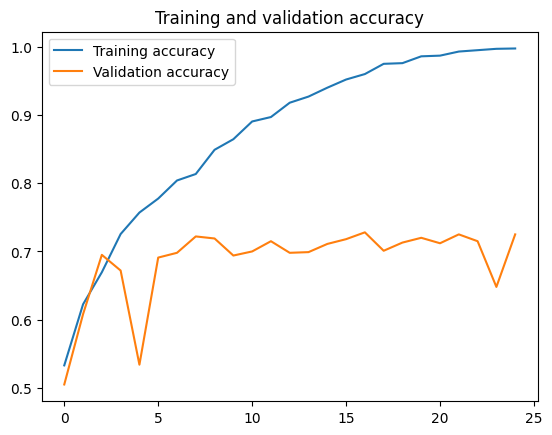

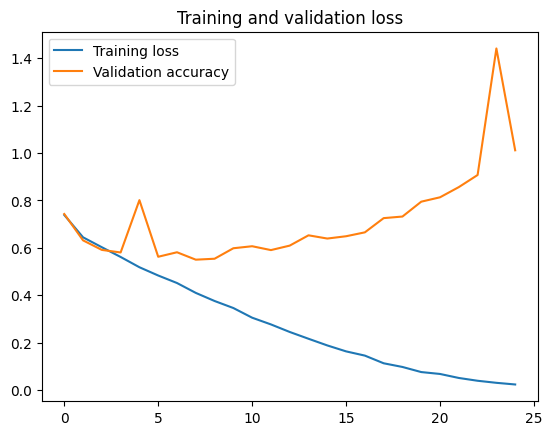

In [ ]:
import matplotlib.pyplot as plt
train_acc = train_model.history['acc']
val_acc = train_model.history['val_acc']
train_loss = train_model.history['loss']
val_loss = train_model.history['val_loss']

epochs = range(len(train_acc))

#write your code below to display plots for accuracy and loss metrics
plt.plot(epochs, train_acc, 'b', label='Training accuracy', color='tab:blue')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color='tab:orange')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'b', label='Training loss', color='tab:blue')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy', color='tab:orange')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### <font color ='blue'> Task 5: Prevent model overfitting issue

*   List item:
*   List item



**Image augmentation:** It is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset. ImageDataGenerator class with all data augmmentation techniques: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

# New Section
**Dropout:** It is a regularization approach that prevents overfitting by ensuring that no units are codependent with one another.

Input → ⚪❌⚪❌ → ⚪⚪❌⚪ → Output


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Type your code below to apply image augmentation techniques on training dataset using the ImageDataGenerator class
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#Type your code below to add dropout layer

from tensorflow.keras.optimizers import RMSprop

model_2 = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64,input_shape=[150,150,3],kernel_size=(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.5),


tf.keras.layers.Flatten(),

tf.keras.layers.Dense(256,activation='relu'),
tf.keras.layers.Dense(1,activation='sigmoid'),

])

model_2.summary()

model_2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 165888)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    42,467,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,543,489 (162.29 MB)

 Trainable params: 42,543,489 (162.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_model_aug = model_2.fit(
      train_generator,
      steps_per_epoch= 80,  # 2000 images = batch_size * steps_per_epoch
      epochs= 25,
      validation_data=validation_generator,
      validation_steps=40 ,  # 1000 images = batch_size * steps_per_epoch
      verbose=2)

Epoch 1/25
80/80 - 15s - 190ms/step - acc: 0.4931 - loss: 0.7621 - val_acc: 0.5500 - val_loss: 0.6781
Epoch 2/25
80/80 - 5s - 67ms/step - acc: 0.5200 - loss: 0.6908 - val_acc: 0.5337 - val_loss: 0.6766
Epoch 3/25
80/80 - 12s - 146ms/step - acc: 0.5831 - loss: 0.6797 - val_acc: 0.5713 - val_loss: 0.6614
Epoch 4/25
80/80 - 5s - 62ms/step - acc: 0.5650 - loss: 0.6760 - val_acc: 0.5875 - val_loss: 0.6578
Epoch 5/25
80/80 - 20s - 255ms/step - acc: 0.5831 - loss: 0.6654 - val_acc: 0.6225 - val_loss: 0.6472
Epoch 6/25
80/80 - 5s - 64ms/step - acc: 0.5925 - loss: 0.6695 - val_acc: 0.5587 - val_loss: 0.6579
Epoch 7/25
80/80 - 12s - 152ms/step - acc: 0.5994 - loss: 0.6525 - val_acc: 0.6550 - val_loss: 0.6269
Epoch 8/25
80/80 - 5s - 56ms/step - acc: 0.6375 - loss: 0.6387 - val_acc: 0.6250 - val_loss: 0.6483
Epoch 9/25
80/80 - 21s - 261ms/step - acc: 0.6263 - loss: 0.6389 - val_acc: 0.6500 - val_loss: 0.6211
Epoch 10/25
80/80 - 5s - 59ms/step - acc: 0.6925 - loss: 0.6238 - val_acc: 0.6525 - val_lo

<ipython-input-16-10dea32075ed>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', label='Training accuracy', color ='tab:blue')
<ipython-input-16-10dea32075ed>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color ='tab:orange')
<ipython-input-16-10dea32075ed>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training Loss', color ='tab:blue')
<ipython-input-16-10dea32075ed>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0

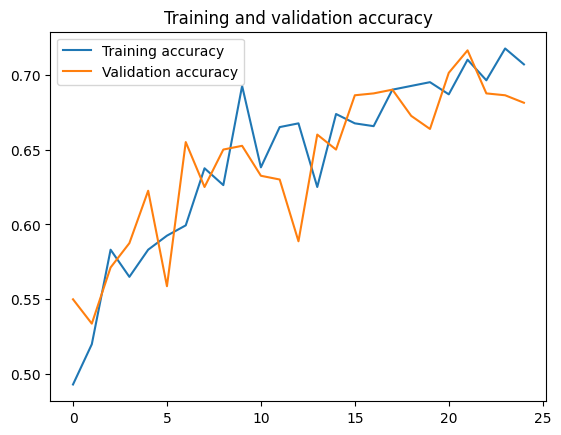

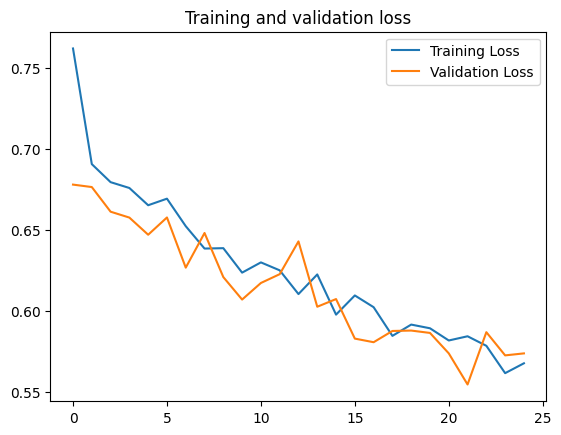

In [ ]:
import matplotlib.pyplot as plt
acc = train_model_aug.history['acc']
val_acc = train_model_aug.history['val_acc']
loss = train_model_aug.history['loss']
val_loss = train_model_aug.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy', color ='tab:blue')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color ='tab:orange')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss', color ='tab:blue')
plt.plot(epochs, val_loss, 'b', label='Validation Loss', color ='tab:orange')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### <font color ='Green'> ***Practice Activity***


1. Copy the developed model from Task 5
2. Add one convolutional layer with 128 neurons, after the second MaxPooling2D layer. The new layer will be followed by the third MaxPooling2D and existing Dropout layer.
3. Compile and run the new model and evaluate its accuracy. Modify the model two times by changing the optimizer to SGD and Adam, train each modified model and compute their accuracy on validation dataset.
4. Fine tune other parameter like learning rate to measure any impact on accuracy


In [ ]:
#Type your code below to add new layers to the existing CNN architecture to improve accuracy

import os
import zipfile
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.optimizers import SGD

model_3 = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64,input_shape=[150,150,3],kernel_size=(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

tf.keras.layers.Dropout(0.5),

tf.keras.layers.Flatten(),

tf.keras.layers.Dense(256,activation='relu'),
tf.keras.layers.Dense(1,activation='sigmoid'),

])

model_3.summary()

model_3.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     9,470,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,693,697 (36.98 MB)

 Trainable params: 9,693,697 (36.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_model_practice = model_3.fit(
      train_generator,
      steps_per_epoch= 40,  # 2000 images = batch_size * steps
      epochs= 50,
      validation_data=validation_generator,
      validation_steps= 20,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/50
40/40 - 11s - 271ms/step - acc: 0.5200 - loss: 0.6961 - val_acc: 0.5225 - val_loss: 0.6898
Epoch 2/50
40/40 - 10s - 249ms/step - acc: 0.5275 - loss: 0.6884 - val_acc: 0.5050 - val_loss: 0.6967
Epoch 3/50
40/40 - 5s - 121ms/step - acc: 0.5625 - loss: 0.6882 - val_acc: 0.6350 - val_loss: 0.6773
Epoch 4/50
40/40 - 41s - 1s/step - acc: 0.5600 - loss: 0.6848 - val_acc: 0.5675 - val_loss: 0.6657
Epoch 5/50
40/40 - 10s - 255ms/step - acc: 0.5863 - loss: 0.6729 - val_acc: 0.4925 - val_loss: 0.6955
Epoch 6/50
40/40 - 5s - 128ms/step - acc: 0.5825 - loss: 0.6695 - val_acc: 0.5800 - val_loss: 0.6464
Epoch 7/50
40/40 - 10s - 254ms/step - acc: 0.6175 - loss: 0.6531 - val_acc: 0.6375 - val_loss: 0.6170
Epoch 8/50
40/40 - 10s - 256ms/step - acc: 0.6288 - loss: 0.6406 - val_acc: 0.6675 - val_loss: 0.6212
Epoch 9/50
40/40 - 3s - 68ms/step - acc: 0.6275 - loss: 0.6362 - val_acc: 0.6775 - val_loss: 0.6101
Epoch 10/50
40/40 - 10s - 256ms/step - acc: 0.6587 - loss: 0.6127 - val_acc: 0.6375 - val

<ipython-input-19-62636667dc3b>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', label='Training accuracy', color ='tab:blue')
<ipython-input-19-62636667dc3b>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color ='tab:orange')
<ipython-input-19-62636667dc3b>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training Loss', color ='tab:blue')
<ipython-input-19-62636667dc3b>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0

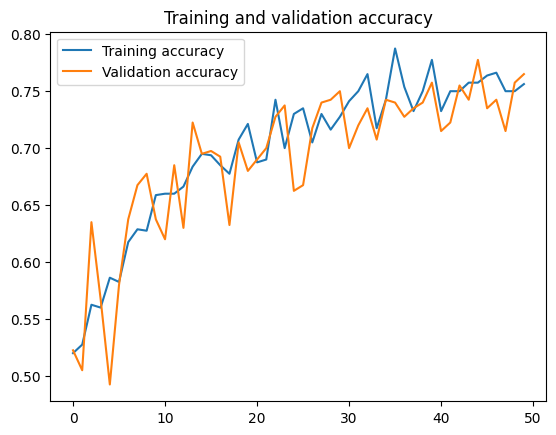

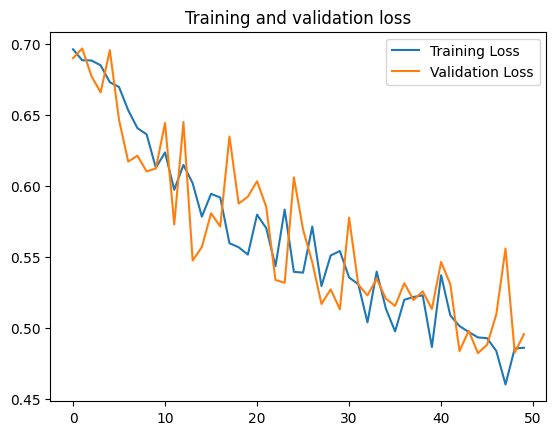

In [ ]:
import matplotlib.pyplot as plt
acc = train_model_practice.history['acc']
val_acc = train_model_practice.history['val_acc']
loss = train_model_practice.history['loss']
val_loss = train_model_practice.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy', color ='tab:blue')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color ='tab:orange')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss', color ='tab:blue')
plt.plot(epochs, val_loss, 'b', label='Validation Loss', color ='tab:orange')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Saving WhatsApp Image 2025-02-13 at 16.31.36_6a88e129.jpg to WhatsApp Image 2025-02-13 at 16.31.36_6a88e129.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step
[1.]
WhatsApp Image 2025-02-13 at 16.31.36_6a88e129.jpg is a dog


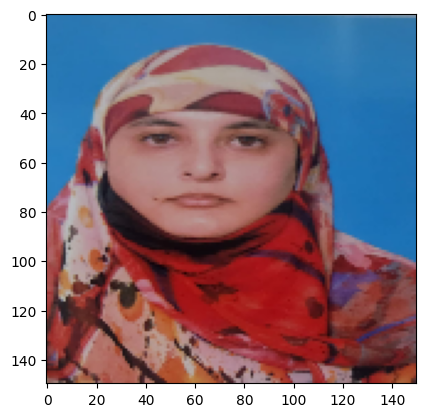

In [ ]:
# Here's a codeblock just for fun. You should be able to upload your pet image here
# and have it classified as either dog or cat

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as pyplot
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images based on the final model_3 we developed during the practice activity
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150,150))
  pyplot.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_3.predict(images, batch_size=10)

  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")


### <font color ='blue'> ***Cumulative Activity***


1. Upload the dataset from either from your local machine or Google drive. [Click here for download](https://drive.google.com/file/d/1byycDDZUbajepuluUGS3C1jl1CXN0WoT/view?usp=share_link)
2. Apply image preprocessing tasks that your learnt from the guided project.
2. Build a neural network model with 3 convolutional layers and 2 dense layers, similar to the model we developed in the previous activity.
3. Compile and run the new model and evaluate its accuracy.
4. Fine tune model parameters like optimizers and learning rate to measure any impact on model accuracy


In [ ]:
import os
import zipfile
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(3,activation='sigmoid', input_dim=2))
model.add(Dense(2))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#load dataset from Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prompt: download from a download link

import requests

def download_file(url, filename):
  """Downloads a file from a given URL and saves it to a specified filename.

  Args:
    url: The URL of the file to download.
    filename: The name of the file to save the downloaded content to.
  """
  response = requests.get(url, stream=True)
  if response.status_code == 200:
    with open(filename, 'wb') as f:
      for chunk in response.iter_content(1024):
        f.write(chunk)
    print(f"Downloaded file to: {filename}")
  else:
    print(f"Failed to download file. Status code: {response.status_code}")


# Example usage:
download_link = "https://drive.usercontent.google.com/download?id=1byycDDZUbajepuluUGS3C1jl1CXN0WoT&export=download&authuser=0&confirm=t&uuid=f2df3e55-b6c3-488a-8d24-40f86ddf251a&at=AN_67v3-tEEUH1tl3ce4jkRwTfTx%3A1729472866001"
filename = "Data.zip"
download_file(download_link, filename)

Downloaded file to: Data.zip


In [ ]:
!unzip -q Data.zip

replace __MACOSX/._Data? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# !cp r'/content/drive/MyDrive/Dataset/Data.zip' '/content'
# local_zip = r'/content/drive/MyDrive/Dataset/Data.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/content')
# zip_ref.close()

In [ ]:
base_dir = '/content/Data/'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training NORMAL chest X-ray pictures
train_normal_dir = os.path.join(train_dir, 'NORMAL')

# Directory with our training COVID-19 chest X-ray pictures
train_covid19_dir = os.path.join(train_dir, 'COVID19')

# Directory with our test NORMAL chest X-ray pictures
test_normal_dir = os.path.join(test_dir, 'NORMAL')

# Directory with our test COVID-19 chest X-ray pictures
test_covid19_dir = os.path.join(test_dir, 'COVID19')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by ImageGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 20,
    class_mode = 'binary'
)

# Flow validation images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 20,
    class_mode = 'binary')


Found 1200 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
#Type your code below to build a CNN model, view the model summary
#and compile it with model hyperparameters such as optimizer, learning rate etc

from tensorflow.keras.optimizers import Adam

model_3 = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64,input_shape=[224,224,3],kernel_size=(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'), ## new layers addition as a part of practice activity
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      tf.keras.layers.Dropout(0.5),

      tf.keras.layers.Flatten(),

      tf.keras.layers.Dense(256,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid'),
])

model_3.summary()

model_3.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,374,913 (85.35 MB)

 Trainable params: 22,374,913 (85.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_model_cumulative = model_3.fit(
      train_generator,
      steps_per_epoch=48 ,  # 1200 images = batch_size * steps_per_epoch
      epochs=25 ,
      validation_data=test_generator,
      validation_steps=12 ,  # 300 images = batch_size * steps_|per_epoch
      verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
48/48 - 39s - 810ms/step - acc: 0.8323 - loss: 0.3617 - val_acc: 0.9625 - val_loss: 0.1081
Epoch 2/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


48/48 - 20s - 415ms/step - acc: 0.9500 - loss: 0.1098 - val_acc: 0.9875 - val_loss: 0.0607
Epoch 3/25
48/48 - 41s - 860ms/step - acc: 0.9625 - loss: 0.0975 - val_acc: 0.9625 - val_loss: 0.0746
Epoch 4/25
48/48 - 9s - 192ms/step - acc: 0.9542 - loss: 0.1423 - val_acc: 0.9833 - val_loss: 0.0779
Epoch 5/25
48/48 - 42s - 868ms/step - acc: 0.9708 - loss: 0.0847 - val_acc: 0.9750 - val_loss: 0.0516
Epoch 6/25
48/48 - 19s - 399ms/step - acc: 0.9917 - loss: 0.0441 - val_acc: 0.9583 - val_loss: 0.0803
Epoch 7/25
48/48 - 27s - 566ms/step - acc: 0.9854 - loss: 0.0595 - val_acc: 0.9958 - val_loss: 0.0379
Epoch 8/25
48/48 - 11s - 219ms/step - acc: 0.9833 - loss: 0.0616 - val_acc: 0.9958 - val_loss: 0.0371
Epoch 9/25
48/48 - 27s - 561ms/step - acc: 0.9844 - loss: 0.0444 - val_acc: 0.9792 - val_loss: 0.0381
Epoch 10/25
48/48 - 10s - 215ms/step - acc: 0.9792 - loss: 0.0520 - val_acc: 0.9750 - val_loss: 0.0449
Epoch 11/25
48/48 - 41s - 848ms/step - acc: 0.9844 - loss: 0.0475 - val_acc: 0.9833 - val_los

In [ ]:
import matplotlib.pyplot as plt
acc = train_model_cumulative.history['acc']
val_acc = train_model_cumulative.history['val_acc']
loss = train_model_cumulative.history['loss']
val_loss = train_model_cumulative.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy', color ='tab:blue')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color ='tab:orange')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss', color ='tab:blue')
plt.plot(epochs, val_loss, 'b', label='Validation Loss', color ='tab:orange')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#Classification model evaluation using confusion matrix technique

from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
preds = model_3.predict(test_generator,verbose=1)
predictions = preds.copy()
predictions[predictions < 0.5] = 0
predictions[predictions > 0.5] = 1
cm = pd.DataFrame(data=confusion_matrix(test_generator.classes, predictions, labels=[0, 1]),index=["Actual Covid-19", "Actual Normal"],
columns=["Predicted Covid-19", "Predicted Normal"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
# Here's a codeblock just for fun. You should be able to upload your pet image here
# and have it classified as either normal and covid-19 condition

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images based on the final model_3 we developed during the practice activity
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224,224))
  plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_3.predict(images, batch_size=10)

  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a normal condition")
  else:
    print(fn + " is a Covid-19 condition")

# New Section